# Final submission: Life-Expectancy Research - From Analysis to Predictive Model
##### By Matan Avitan (304858343) and Yoav Katzav (318226842)

# Describing our predicting problem in simple manner -


## Given several country related features over time we try to predict the life expectency.

### In this notebook we will:
* Dive into the data properties and try to understand where it's weak and strong spots.
* Try to fix some of the data problems pre-training our benchmark model.
* Develop the Benchmark Model.
* Develop the Actual Model.
* Evaluate and Compare them.
* And write our conclusions :)


## So, let's start!...

# Part 1: Data Overview



Before we'll start we would like to state that our data wasn't originally started with years data, we integrated additional data on economic, social, and health features from authoritative sources like the World Health Organization, the World Bank and more over several years. After standardizing data formats and scales through cleaning processes, we merged the datasets into a comprehensive format. This allowed us to apply machine learning algorithms effectively.

In [2]:
import pandas as pd

# Load the dataset
file_path = 'Life Expectancy Data_v5.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Country Code,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Gini index,PPP,Unemployment,alcohol consumption,Gender Equality,Education expenditure from GDP,self employed,percent of married woman 15-49,Birth rate,suicide rate
0,AFG,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,NaN,17.752737,7.915,NaN,1.5,3.69522,87.962624,NaN,39.105,3.9
1,AFG,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,NaN,17.656085,NaN,NaN,1.5,3.45446,88.425984,NaN,39.601,4.0
2,AFG,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,NaN,17.090013,1.692,NaN,2.0,2.60420,88.962526,NaN,40.009,4.0
3,AFG,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,NaN,16.788313,NaN,NaN,2.0,3.46201,89.540887,21.2,39.855,4.1
4,AFG,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,...,NaN,15.489844,NaN,0.01241,2.0,3.47945,90.049460,21.8,40.602,4.3




> *We can see that the data has numerical and categorical values, some null values, different ranges of columns for starters, let's try to understand better by describe...*



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical features
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Gini index,PPP,Unemployment,alcohol consumption,Gender Equality,Education expenditure from GDP,self employed,percent of married woman 15-49,Birth rate,suicide rate
count,2377.000000,2370.000000,2370.000000,2377.000000,2360.000000,2377.000000,1882.000000,2377.000000,2345.000000,2377.000000,...,898.000000,2215.000000,1462.000000,467.000000,629.000000,1641.000000,2310.000000,458.000000,2376.000000,2370.000000
mean,2007.017669,69.237426,162.759916,31.624737,4.583419,908.726033,80.736451,2390.114430,37.955778,44.109382,...,37.822383,160.871285,7.959775,5.387991,3.399046,4.495139,43.887588,46.434498,23.373304,10.946287
std,4.327271,9.670205,126.553857,127.544234,4.078595,2174.941398,25.019028,11142.897926,20.019979,173.700344,...,8.908294,602.459541,5.465669,4.353133,0.638269,1.858599,27.744979,22.558298,11.562753,9.069527
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.000000,0.000000,...,23.700000,0.025350,0.200000,0.000000,1.500000,0.850320,0.440765,3.500000,7.700000,0.000000
25%,2003.000000,63.000000,71.000000,0.000000,0.760000,30.303747,76.000000,0.000000,18.700000,0.000000,...,30.900000,0.957907,4.164750,1.527765,3.000000,3.177850,17.154945,26.925000,12.699500,4.800000
50%,2007.000000,72.200000,138.000000,3.000000,3.835000,143.294749,92.000000,15.000000,43.500000,3.000000,...,35.600000,4.350906,6.756500,4.651410,3.500000,4.326911,38.919609,50.450000,21.339500,8.450000
75%,2011.000000,75.800000,227.000000,21.000000,7.592500,599.039240,96.000000,376.000000,55.900000,26.000000,...,43.700000,69.481240,10.240500,8.513865,4.000000,5.458900,68.450733,65.500000,32.676250,13.800000
max,2014.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,...,64.800000,8013.255859,35.460000,19.047270,5.000000,14.059080,95.097512,86.900000,52.659000,92.600000




> *We can see that not all of the columns has the same values count, it might take effect on our prediction, also we see some outliers perhaps by the different quantiles*



In [4]:
# Checking for missing values
data.isnull().sum().sort_values(ascending=False)

percent of married woman 15-49     1919
alcohol consumption                1910
Gender Equality                    1748
Gini index                         1479
Unemployment                        915
Education expenditure from GDP      736
Hepatitis B                         495
Population                          263
PPP                                 162
GDP                                  71
self employed                        67
Income composition of resources      35
 thinness  1-19 years                32
 thinness 5-9 years                  32
 BMI                                 32
Schooling                            31
Total expenditure                    30
Diphtheria                           19
Polio                                19
Alcohol                              17
Life expectancy                       7
suicide rate                          7
Adult Mortality                       7
Birth rate                            1
Country Code                          0




> *A lot of null values in some of the columns, it might affect our model as well.*



In [5]:
# Remove rows where the target variable 'Life expectancy' is missing
data = data.dropna(subset=["Life expectancy"])

<ipython-input-6-5840251c56f7>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Year', y='Life expectancy', estimator='mean', ci=None, marker='o')


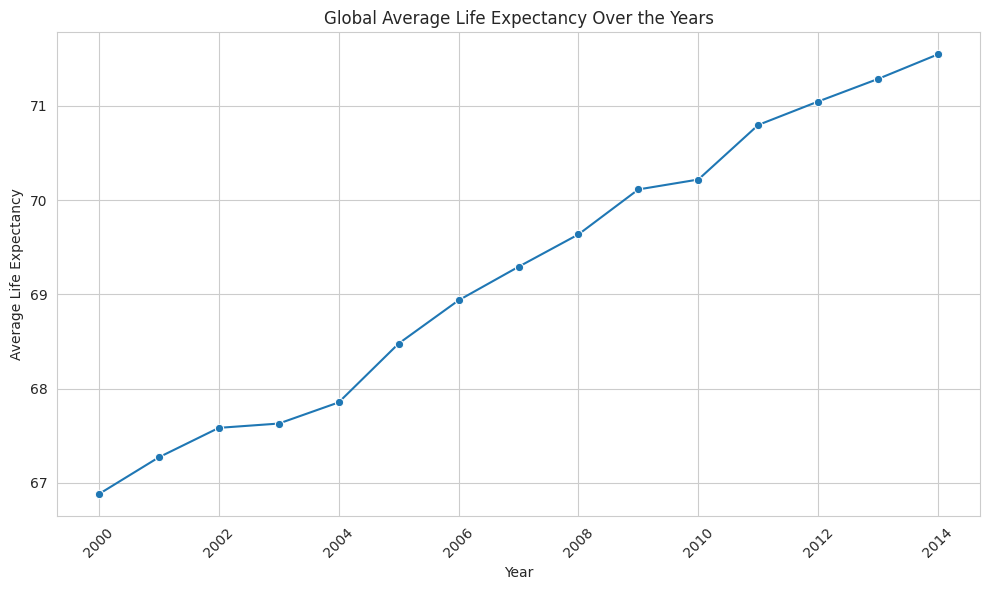

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Average life expectancy over the years globally
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='Life expectancy', estimator='mean', ci=None, marker='o')
plt.title('Global Average Life Expectancy Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



> *The average life-expectancy is going up over the years, interesting..*



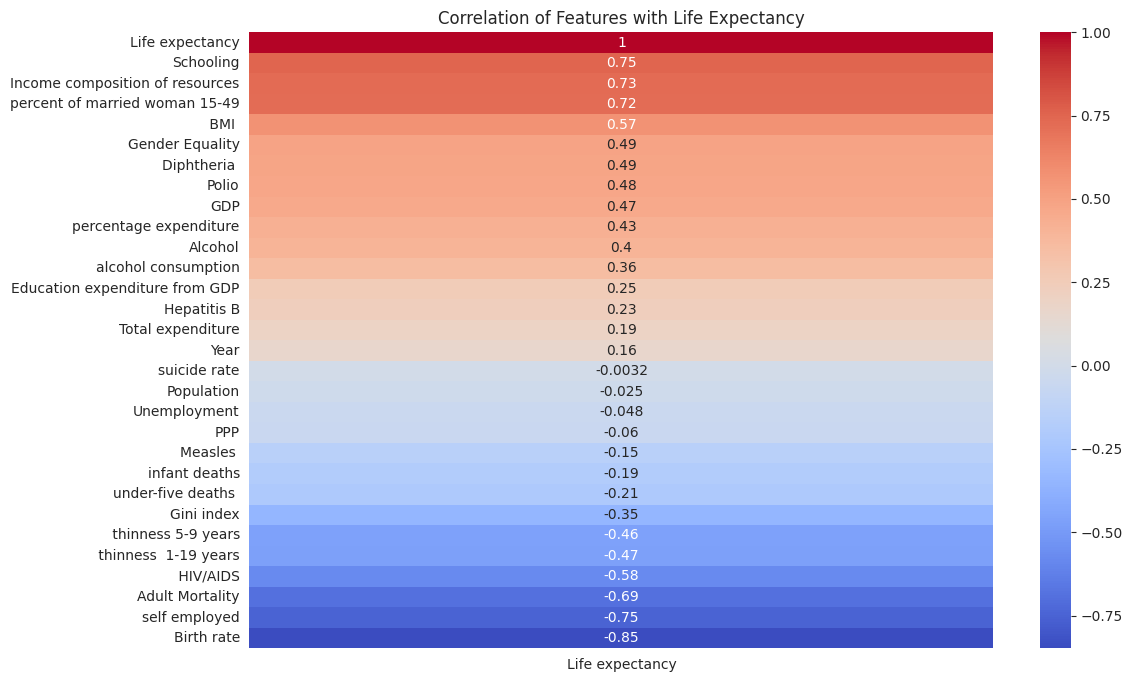

In [7]:
import numpy as np
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation analysis to identify relationships with life expectancy
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix focusing on life expectancy
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['Life expectancy']].sort_values(by='Life expectancy', ascending=False), cmap='coolwarm', annot=True)
plt.title('Correlation of Features with Life Expectancy')
plt.show()



> *We can see here at the correlations above that some of the features affect the life-expectancy in a positive manner and some in a negative manner, we'll dive into that below*



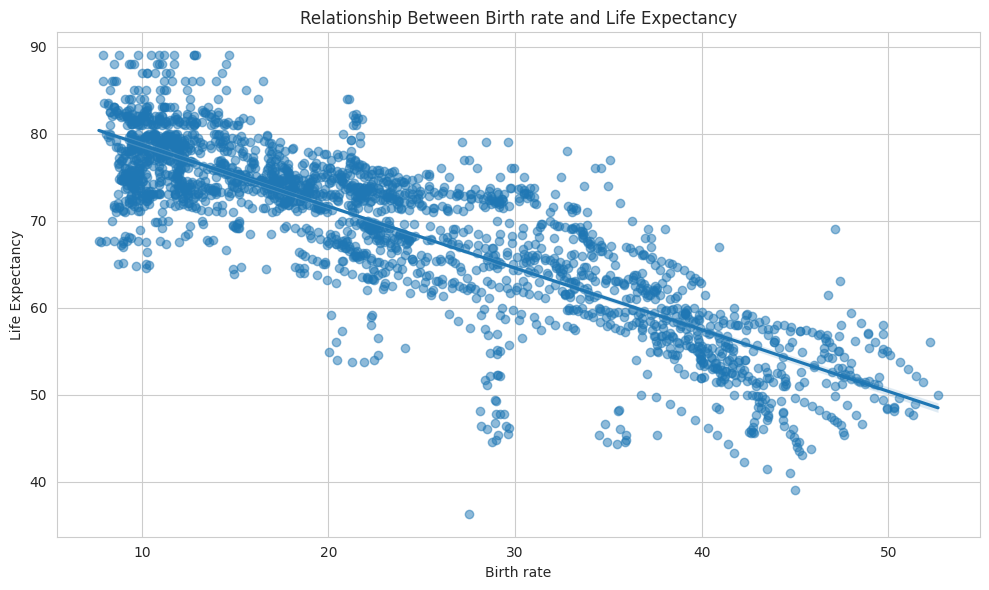

In [8]:
# Taking the 2 edged fields
# Relationship between Birth rate and life expectancy

plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Birth rate', y='Life expectancy', scatter_kws={'alpha':0.5})
plt.title('Relationship Between Birth rate and Life Expectancy')
plt.xlabel('Birth rate')
plt.ylabel('Life Expectancy')
plt.tight_layout()
plt.show()



> *We can see an opposite relation between Birth rate to life expectancy*



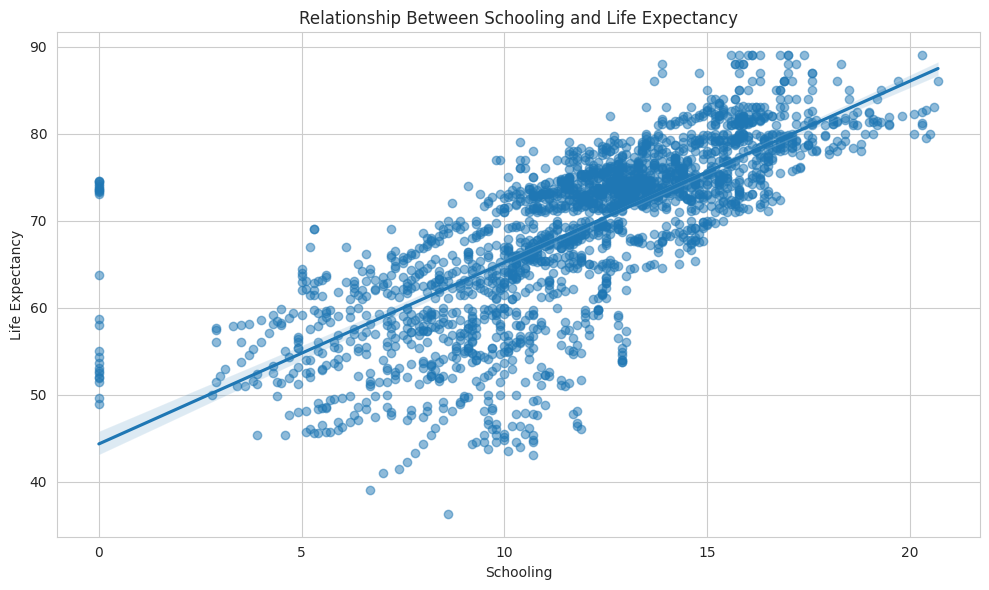

In [9]:
# Taking the 2 edged fields
# Relationship between Schooling and life expectancy

plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Schooling', y='Life expectancy', scatter_kws={'alpha':0.5})
plt.title('Relationship Between Schooling and Life Expectancy')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.tight_layout()
plt.show()



> *We can see a positive relation between Schooling to life expectancy*



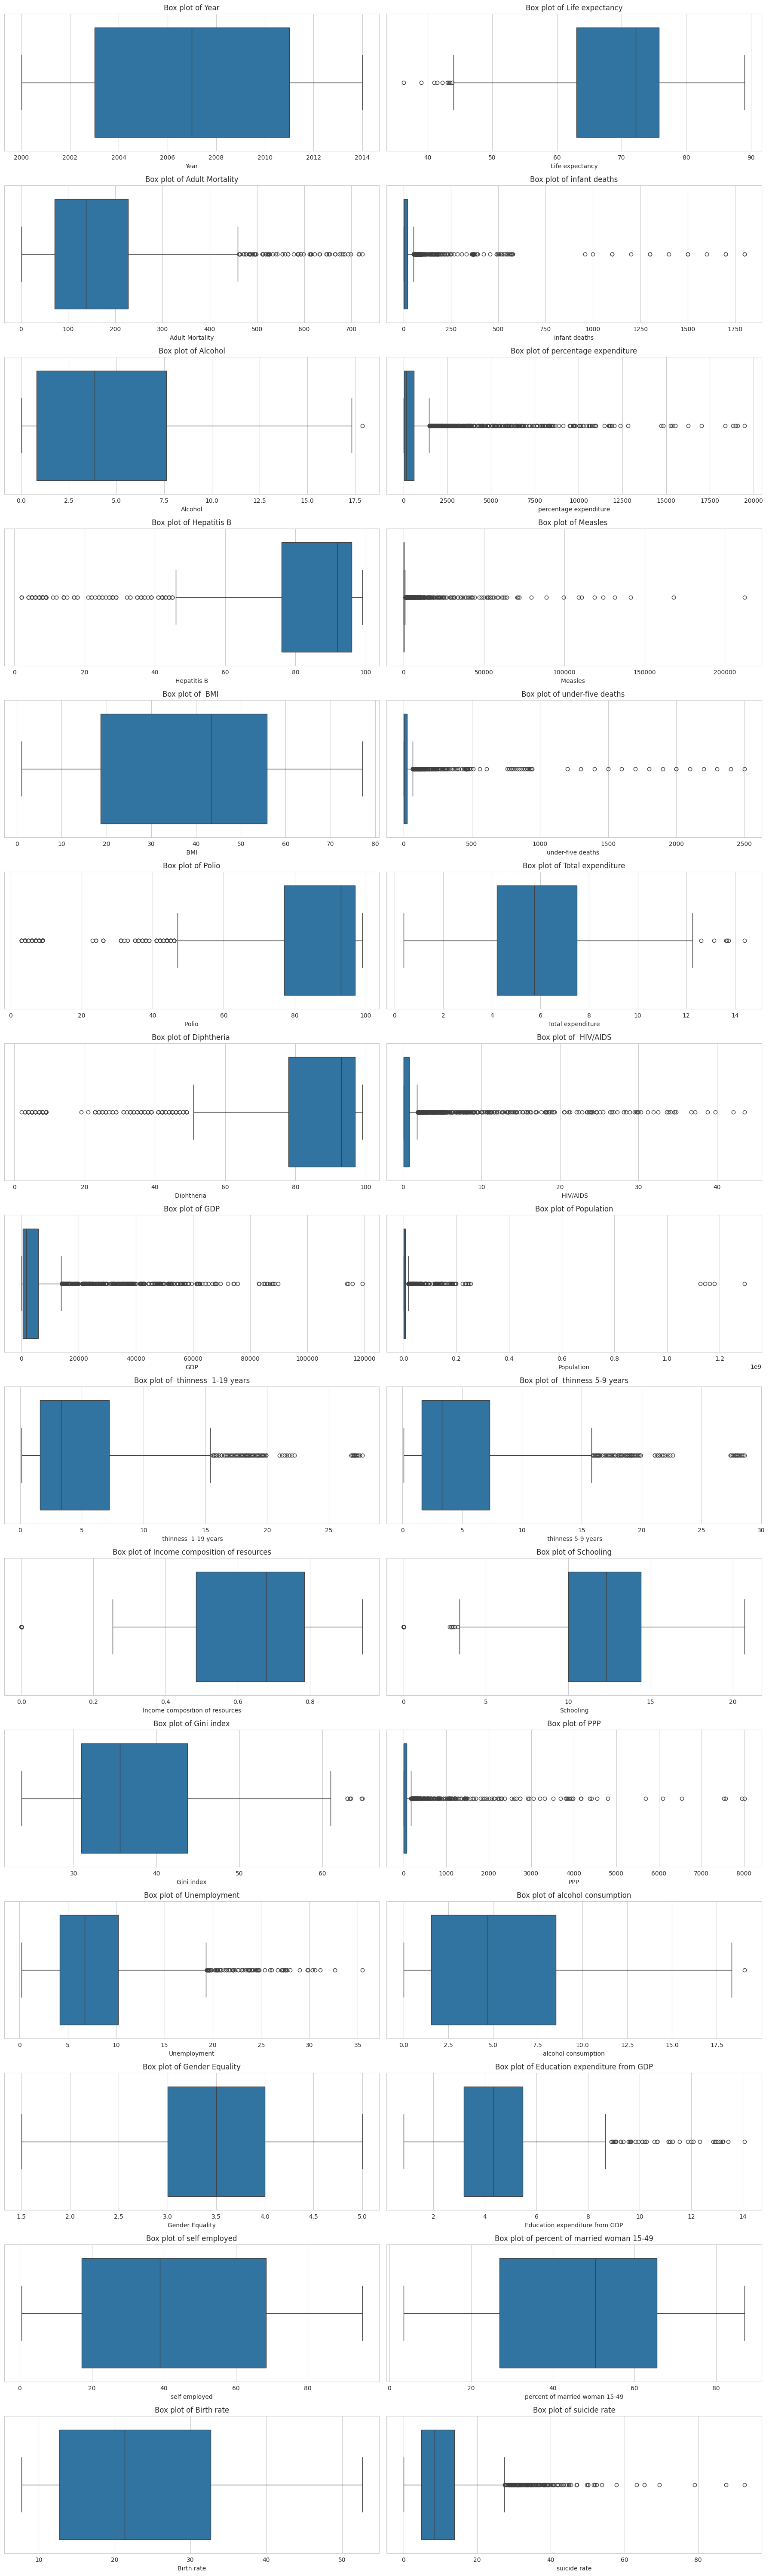

In [10]:
# Filtering out numerical columns for outlier analysis
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Creating box plots for all numerical fields to identify outliers
num_plots = len(numerical_columns)
num_rows = (num_plots // 2) + (num_plots % 2)
fig, axes = plt.subplots(num_rows, 2, figsize=(18, num_rows * 4))

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=data, x=col, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Box plot of {col}')

# Adjusting layout to avoid overlapping and hiding empty subplots if the number of plots is odd
plt.tight_layout()
if num_plots % 2 != 0:
    axes[num_rows-1, 1].set_visible(False)

plt.show()

#### So, our Conclusions from this part are:
We can learn from the data above several aspects:
1. We have several catagorical fields that we'll need to address to.
2. The data is over-time data so we'll might need to address specific years with less data.
3. We have substansial amount of null data we'll need to fill in.
4. Not all of the fields are meaningful for out prediction (overall some less and some more)
5. We have several critic outliers we'll need to clean.
6. We would like to remove fields with a lot of missing values such as the following:
 * alcohol consumption                1910
 * Gender Equality                    1748
 * Gini index                         1479

# Part 2: Data Pre-Processing

In [11]:
# Removing fields with a lot of null values
fixed_data = data.copy()

threshold = 1000

columns_to_delete = []

for col in fixed_data.columns:
    if fixed_data[col].isnull().sum() > threshold:
        columns_to_delete.append(col)

fixed_data.drop(columns=columns_to_delete, inplace=True)

print(f"Removed the following columns with over {threshold} null values: {columns_to_delete}")

Removed the following columns with over 1000 null values: ['Gini index', 'alcohol consumption', 'Gender Equality', 'percent of married woman 15-49']


In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Split the data based on the 'Year' column
train_data = fixed_data[fixed_data['Year'] <= 2012]
test_data = fixed_data[fixed_data['Year'] > 2012]

# Split each set into features (X) and target (y)
X_train = train_data.drop(columns=["Life expectancy"])
y_train = train_data["Life expectancy"]
X_test = test_data.drop(columns=["Life expectancy"])
y_test = test_data["Life expectancy"]

# Now proceed with imputation and other preprocessing steps

# Separating numerical and categorical data for targeted processing in training data
numerical_data_x_train = X_train.select_dtypes(include=['float64', 'int64'])
categorical_data_x_train = X_train.select_dtypes(include=['object'])

# Imputing missing values in numerical data for the training set
numerical_imputer = SimpleImputer(strategy='median')
numerical_data_imputed_train = numerical_imputer.fit_transform(numerical_data_x_train)
numerical_data_imputed_train_df = pd.DataFrame(numerical_data_imputed_train, columns=numerical_data_x_train.columns)

# Imputing missing values in categorical data for the training set
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_data_imputed_train = categorical_imputer.fit_transform(categorical_data_x_train)
categorical_data_imputed_train_df = pd.DataFrame(categorical_data_imputed_train, columns=categorical_data_x_train.columns)

# Separating numerical and categorical data for targeted processing in testing data
numerical_data_x_test = X_test.select_dtypes(include=['float64', 'int64'])
categorical_data_x_test = X_test.select_dtypes(include=['object'])

# Imputing missing values in numerical data for the test set using the same imputer
numerical_data_imputed_test = numerical_imputer.transform(numerical_data_x_test)
numerical_data_imputed_test_df = pd.DataFrame(numerical_data_imputed_test, columns=numerical_data_x_test.columns)

# Imputing missing values in categorical data for the test set using the same imputer
categorical_data_imputed_test = categorical_imputer.transform(categorical_data_x_test)
categorical_data_imputed_test_df = pd.DataFrame(categorical_data_imputed_test, columns=categorical_data_x_test.columns)

In [13]:
# Printing the sizes of the training and testing sets
print("Training set size:")
print(f"X_train: {X_train.shape} - {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"y_train: {y_train.shape} - {y_train.shape[0]} samples")

print("\nTesting set size:")
print(f"X_test: {X_test.shape} - {X_test.shape[0]} samples, {X_test.shape[1]} features")
print(f"y_test: {y_test.shape} - {y_test.shape[0]} samples")

Training set size:
X_train: (2054, 28) - 2054 samples, 28 features
y_train: (2054,) - 2054 samples

Testing set size:
X_test: (316, 28) - 316 samples, 28 features
y_test: (316,) - 316 samples


In [14]:
# Encoding categorical variables using Label Encoding
label_encoder = LabelEncoder()
# Applying Label Encoding to each categorical column
for col in categorical_data_imputed_train_df.columns:
    categorical_data_imputed_train_df[col] = label_encoder.fit_transform(categorical_data_imputed_train_df[col])

# Applying Label Encoding to each categorical column
for col in categorical_data_imputed_test_df.columns:
    categorical_data_imputed_test_df[col] = label_encoder.fit_transform(categorical_data_imputed_test_df[col])

# Combining the processed numerical and encoded categorical data
encoded_train = pd.concat([numerical_data_imputed_train_df.reset_index(drop=True), categorical_data_imputed_train_df.reset_index(drop=True)], axis=1)
encoded_data = pd.concat([encoded_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

X_test = pd.concat([numerical_data_imputed_test_df.reset_index(drop=True), categorical_data_imputed_test_df.reset_index(drop=True)], axis=1)


# Saving the fully processed dataset locally
encoded_data_file_path = 'Life_Expectancy_Data_Encoded.csv'
encoded_data.to_csv(encoded_data_file_path, index=False)

pd.set_option('display.max_columns', None)
encoded_data.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,PPP,Unemployment,Education expenditure from GDP,self employed,Birth rate,suicide rate,Country Code,Country,Status,Life expectancy
0,2012.0,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,17.090013,1.692,2.604200,88.962526,40.009,4.0,0,0,1,59.5
1,2011.0,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,16.788313,6.790,3.462010,89.540887,39.855,4.1,0,0,1,59.2
2,2010.0,279.0,74.0,0.01,79.679367,66.0,1989.0,16.7,102.0,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,15.489844,6.790,3.479450,90.049460,40.602,4.3,0,0,1,58.8
3,2009.0,281.0,77.0,0.01,56.762217,63.0,2861.0,16.2,106.0,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,15.408210,6.790,4.810640,90.590873,41.157,4.4,0,0,1,58.6
4,2008.0,287.0,80.0,0.03,25.873925,64.0,1599.0,15.7,110.0,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,16.475607,2.495,4.383672,91.096194,41.506,4.6,0,0,1,58.1


In [15]:
from scipy.stats import iqr

# Function to handle outliers using the IQR method
def handle_outliers_with_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Handling high outliers for selected numerical columns based on previous analysis
numerical_columns_for_outlier_handling = [
    'Adult Mortality',
    'Schooling',
    'infant deaths',
    'Alcohol',
    'percentage expenditure',
    'Hepatitis B',
    'GDP',
    'Measles ',
    'under-five deaths ',
    'Polio',
    'Diphtheria ',
    ' HIV/AIDS',
    'Population',
    ' thinness  1-19 years',
    ' thinness 5-9 years',
    'PPP',
    'Unemployment',
]

cleaned_data = encoded_data.copy()

for col in numerical_columns_for_outlier_handling:
    cleaned_train = handle_outliers_with_iqr(cleaned_data, col)

# Saving the cleaned dataset locally
cleaned_file_path = 'Life_Expectancy_Data_Cleaned.csv'
cleaned_data.to_csv(cleaned_file_path, index=False)

cleaned_data.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,PPP,Unemployment,Education expenditure from GDP,self employed,Birth rate,suicide rate,Country Code,Country,Status,Life expectancy
0,2012.0,272.0,55.0,0.01,78.184215,67.0,1050.0,17.6,70.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.7,15.85,0.463,9.8,17.090013,2.995875,2.604200,88.962526,40.009,4.0,0,0,1,59.5
1,2011.0,275.0,55.0,0.01,7.097109,68.0,1050.0,17.2,70.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.7,15.85,0.454,9.5,16.788313,6.790000,3.462010,89.540887,39.855,4.1,0,0,1,59.2
2,2010.0,279.0,55.0,0.01,79.679367,66.0,1050.0,16.7,70.0,66.0,9.20,66.0,0.1,553.328940,2883167.0,15.7,15.85,0.448,9.2,15.489844,6.790000,3.479450,90.049460,40.602,4.3,0,0,1,58.8
3,2009.0,281.0,55.0,0.01,56.762217,65.0,1050.0,16.2,70.0,63.0,9.42,63.0,0.1,445.893298,284331.0,15.7,15.85,0.434,8.9,15.408210,6.790000,4.810640,90.590873,41.157,4.4,0,0,1,58.6
4,2008.0,287.0,55.0,0.03,25.873925,65.0,1050.0,15.7,70.0,64.0,8.33,64.0,0.1,373.361116,2729431.0,15.7,15.85,0.433,8.7,16.475607,2.995875,4.383672,91.096194,41.506,4.6,0,0,1,58.1


In [16]:
# moveing Life expectancy column to be the second column
columns = list(cleaned_data.columns)
columns.remove('Life expectancy')
columns.insert(1, 'Life expectancy')
cleaned_data = cleaned_data[columns]

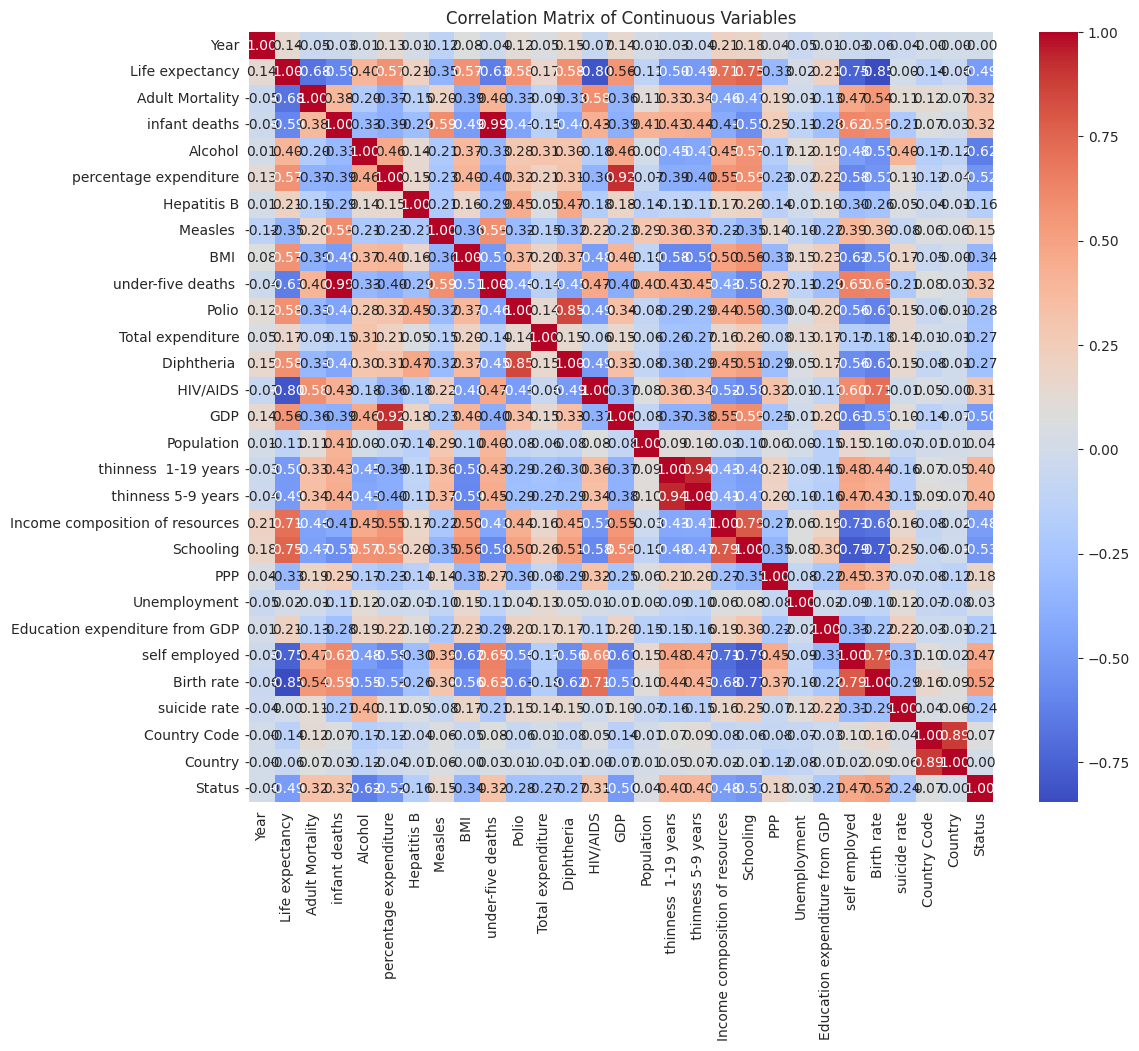

{(' HIV/AIDS', 'Birth rate'),
 (' thinness  1-19 years', ' thinness 5-9 years'),
 ('Country Code', 'Country'),
 ('Income composition of resources', 'Schooling'),
 ('Income composition of resources', 'self employed'),
 ('Life expectancy', ' HIV/AIDS'),
 ('Life expectancy', 'Birth rate'),
 ('Life expectancy', 'Income composition of resources'),
 ('Life expectancy', 'Schooling'),
 ('Life expectancy', 'self employed'),
 ('Polio', 'Diphtheria '),
 ('Schooling', 'Birth rate'),
 ('Schooling', 'self employed'),
 ('infant deaths', 'under-five deaths '),
 ('percentage expenditure', 'GDP'),
 ('self employed', 'Birth rate')}

In [17]:
# Calculate the correlation matrix for the continuous variables in the dataset
correlation_matrix = cleaned_data.select_dtypes(include=[float, int]).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

# Identifying highly correlated pairs (above 0.7 or below -0.7, excluding the diagonal)
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add((correlation_matrix.columns[j], colname))

correlated_features

In [18]:
# Identify highly correlated pairs (above 0.7 or below -0.7, excluding the diagonal) for removal
correlated_variables = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            correlated_variables.add(correlation_matrix.columns[i])

# Dataframe after removing the identified highly correlated variables
reduced_data = cleaned_data.drop(columns=list(correlated_variables))
# remove those features also from test
X_test = X_test.drop(columns=list(correlated_variables))

reduced_file_path = 'Life_Expectancy_Data_Reduced.csv'
reduced_data.to_csv(reduced_file_path, index=False)

print(f"Removed the following redundant columns: {list(correlated_variables)}")

Removed the following redundant columns: ['Country', 'Income composition of resources', 'GDP', ' HIV/AIDS', 'Birth rate', ' thinness 5-9 years', 'under-five deaths ', 'Diphtheria ', 'self employed', 'Schooling']


In [19]:
reduced_data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Population,thinness 1-19 years,PPP,Unemployment,Education expenditure from GDP,suicide rate,Country Code,Status
0,2012.0,59.5,272.0,55.0,0.01,78.184215,67.0,1050.0,17.6,67.0,8.52,3696958.0,15.7,17.090013,2.995875,2.604200,4.0,0,1
1,2011.0,59.2,275.0,55.0,0.01,7.097109,68.0,1050.0,17.2,68.0,7.87,2978599.0,15.7,16.788313,6.790000,3.462010,4.1,0,1
2,2010.0,58.8,279.0,55.0,0.01,79.679367,66.0,1050.0,16.7,66.0,9.20,2883167.0,15.7,15.489844,6.790000,3.479450,4.3,0,1
3,2009.0,58.6,281.0,55.0,0.01,56.762217,65.0,1050.0,16.2,63.0,9.42,284331.0,15.7,15.408210,6.790000,4.810640,4.4,0,1
4,2008.0,58.1,287.0,55.0,0.03,25.873925,65.0,1050.0,15.7,64.0,8.33,2729431.0,15.7,16.475607,2.995875,4.383672,4.6,0,1


In [20]:
reduced_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Population,thinness 1-19 years,PPP,Unemployment,Education expenditure from GDP,suicide rate,Country Code,Status
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2.054000e+03,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,2006.000000,68.902288,161.622201,13.572055,4.731273,383.312996,87.442064,271.236611,37.506621,84.666504,5.809839,3.837776e+06,4.804917,31.779731,6.852275,4.437205,11.032717,78.500000,0.816456
std,3.742569,9.782776,118.888489,19.168223,4.028083,489.163573,11.182379,413.628958,19.661688,16.572275,2.338613,4.939225e+06,4.086380,46.607933,2.188151,1.528701,8.996409,45.620864,0.387206
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,65.000000,0.000000,1.000000,47.000000,0.370000,3.400000e+01,0.100000,0.025350,2.995875,0.850320,0.000000,0.000000,0.000000
25%,2003.000000,62.500000,72.000000,0.000000,1.100000,29.661605,83.000000,0.000000,18.400000,77.000000,4.212500,2.724840e+05,1.700000,1.030641,5.825250,3.754333,4.800000,39.000000,1.000000
50%,2006.000000,72.100000,139.000000,3.000000,4.030000,128.085100,92.000000,18.000000,43.000000,93.000000,5.700000,1.363050e+06,3.300000,4.261922,6.790000,4.325140,8.500000,78.500000,1.000000
75%,2009.000000,75.600000,229.000000,22.000000,7.670000,574.369417,95.000000,420.000000,55.400000,97.000000,7.430000,5.736123e+06,7.300000,47.613316,7.711500,4.906952,13.975000,118.000000,1.000000
max,2012.000000,89.000000,464.500000,55.000000,17.525000,1391.431134,99.000000,1050.000000,76.200000,99.000000,14.390000,1.393158e+07,15.700000,117.487329,10.540875,14.059080,79.100000,157.000000,1.000000


### Conclusions from Part 2: Data Pre-processing

From the data pre-processing activities undertaken, several key adjustments were made to refine the dataset for further analysis:

* Fields with excessive missing values (over 1000) were identified and removed to enhance data quality.
* The dataset was split into training and testing sets based on the 'Year' to assess models on new data.
* Missing values were addressed through median and mode imputation for numerical and categorical data respectively, ensuring data integrity.
* Categorical fields were encoded to transform text data into a machine-readable format, essential for modeling.
* Outliers in critical numerical fields were capped using the Interquartile Range (IQR) method to prevent distortion in model predictions.
* Highly correlated features were identified and removed to prevent multicollinearity, focusing the analysis on independent variables.

These steps systematically prepared the dataset, ensuring it is well-structured and robust for predictive modeling.

# Before Diving in to the Actual training..
In Our research we tried to understand what could be the best fit for the model part to work with our data, the reason is because our data is constructed from a lot of indicator fields and is organized by a time line accross a lot of years, we wanted to work with a model that can benefit the most from all of these fields connections and from the fact that they are organized by a timeline.

This is the reason we chose to train a Neural-Network model over several iterations accross the years in an ascending order, this type of training comes from a field that is known as "Curriculum Learning".


# Our Model Overview

In both of our benchmark and actual model we chose a similar architecture because we wanted to check the effect of the curriculum learning technique on the model's training.

After several attempts (starting from a NN too small to a NN too big to learn) we've reached the following architecture of our NN:

- Dense Layer with 256 neurons.
- A batch normalization layer.
- A 40% Dropout Layer.
- Another Dense Layer with 128 neurons.
- A batch normalization layer.
- A 30% Dropout Layer.
- Another Dense Layer with 64 neurons.
- A batch normalization layer.
- A 20% Dropout Layer.
- Another Dense Layer with 32 neurons.
- And an output Layer with 1 neuron (Predicting the 'Life Expectancy').


The reason for this architecture is because when trained with only 3 layers network without much parameters and without dropout at all we got an overfitting on the training set but really bad results on the test set (it was predicting 2000-years life-expectancy!),
Then we added the dropout layer and the results on the test set started to get better but it's still weren't there yet,
So we've added more neurons to the network with another layer to help the model understand better the hidden-connections between the change of the data over the years (and in general) and we've added a decending dropout layer amount (because we assumed that as we go deeper in the network the neurons are more high-level and require less attention),
And then, after 30-epochs we got good enough results to see the differences between our benchmark model to the actual one.

We also used an RMSE metric to check our model because it has the ability to highlight large errors, as it squares these errors before averaging, and it presents results in the same units as the target variable, providing clear, straightforward comparisons between models.



# Our Benchmark Model

In this section we have 3 parts as follows:
- Model's Setup phase
- Model's Actual training.
- Model's Evaluation.

### Benchmark Model note:

The benchmark model is trained on all of the years data in a random manner, so there is no importance here to the data timeline.

At the 'EVALUATION STEP' though we wanted to check how will the benchmark model will perform in predicting the upcoming years so we ran it over years 2013 and 2014 in ascending order.

In [47]:
# BENCHMARK MODEL SETUP PHASE

import numpy as np
import tensorflow as tf
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt

# Prepare the data scaler based on the training data, excluding 'Year'
X_train = reduced_data.drop(columns=["Life expectancy"])
y_train = reduced_data["Life expectancy"]

X_train_features = X_train.drop(columns=['Year'])
X_test_features = X_test.drop(columns=['Year'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)
X_test_scaled = scaler.transform(X_test_features)

# Define the neural network model structure with additional techniques
def create_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)  # Output layer for regression
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['RootMeanSquaredError'])
    return model

# Initialize the model
model = create_model(X_train_scaled.shape[1])

testing_years = np.sort(X_test['Year'].unique())

# Check the range of years at the testing sets
print("Testing years:", np.sort(X_test['Year'].unique()))

Testing years: [2013. 2014.]


Training Benchmark Model on the entire dataset...
  Fold 1
  Fold 2
  Fold 3
  Fold 4
  Fold 5
  Fold 6
  Fold 7
  Fold 8
  Fold 9
  Fold 10


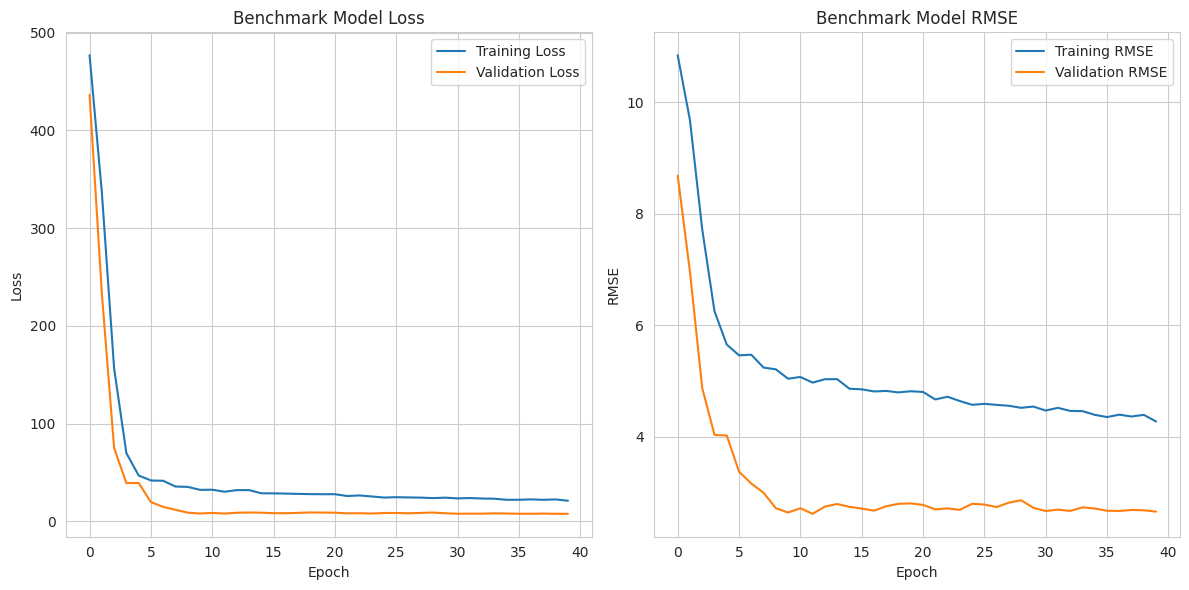

In [48]:
# BENCHMARK TRAINING PHASE

from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)
benchmark_histories = []

print("Training Benchmark Model on the entire dataset...")
for fold, (train_index, val_index) in enumerate(kf.split(X_train_scaled)):
    print(f"  Fold {fold+1}")
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=40,
        verbose=0
    )

    benchmark_histories.append(history.history)

# Aggregate the metrics for benchmark model
benchmark_metrics = {
    'train_loss': np.mean([hist['loss'] for hist in benchmark_histories], axis=0),
    'val_loss': np.mean([hist['val_loss'] for hist in benchmark_histories], axis=0),
    'train_rmse': np.mean([hist['root_mean_squared_error'] for hist in benchmark_histories], axis=0),
    'val_rmse': np.mean([hist['val_root_mean_squared_error'] for hist in benchmark_histories], axis=0)
}

# Plot the training and validation performance for the benchmark model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(benchmark_metrics['train_loss'], label='Training Loss')
plt.plot(benchmark_metrics['val_loss'], label='Validation Loss')
plt.title('Benchmark Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(benchmark_metrics['train_rmse'], label='Training RMSE')
plt.plot(benchmark_metrics['val_rmse'], label='Validation RMSE')
plt.title('Benchmark Model RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()


Testing on year 2013.0...
5/5 [==============================] - 0s 2ms/step
Tested on year 2013.0: R-squared (R2) = -8.4231, RMSE = 25.9311

Testing on year 2014.0...
5/5 [==============================] - 0s 2ms/step
Tested on year 2014.0: R-squared (R2) = -46.5377, RMSE = 60.1970


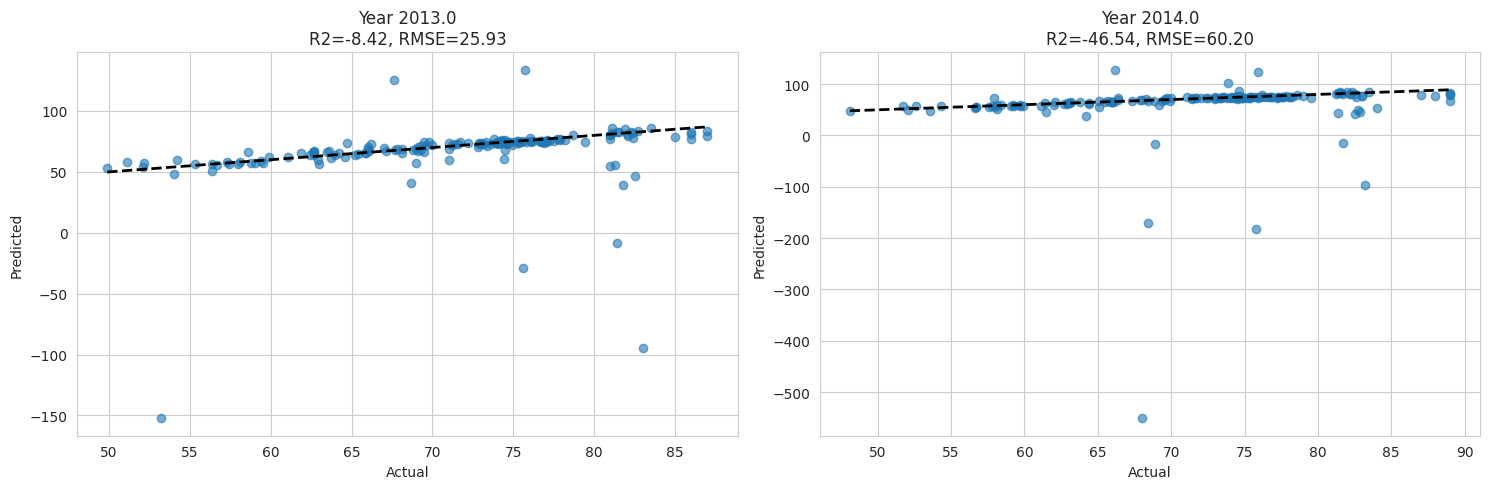


Overall performance on the test set:
R-squared (R2): -28.1023
RMSE: 46.3471


In [49]:
# EVALUATION PHASE

plt.figure(figsize=(15, 5))

all_y_test = []
all_y_pred = []

for i, year in enumerate(testing_years):
    print(f"\nTesting on year {year}...")
    test_indices = X_test['Year'] == year
    X_year_test = X_test_scaled[test_indices]

    # Use .iloc to index y_test based on the positions of the true values in test_indices
    y_year_test = y_test.iloc[test_indices[test_indices].index]

    # Predict and evaluate
    y_pred = model.predict(X_year_test).flatten()
    all_y_test.extend(y_year_test.tolist())  # Convert to list for extending
    all_y_pred.extend(y_pred.tolist())

    r2 = r2_score(y_year_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_year_test, y_pred))
    print(f"Tested on year {year}: R-squared (R2) = {r2:.4f}, RMSE = {rmse:.4f}")

    # Plot actual vs. predicted life expectancy
    plt.subplot(1, len(testing_years), i+1)
    plt.scatter(y_year_test, y_pred, alpha=0.6)
    plt.plot([min(all_y_test), max(all_y_test)], [min(all_y_test), max(all_y_test)], 'k--', lw=2)
    plt.title(f'Year {year}\nR2={r2:.2f}, RMSE={rmse:.2f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

# Overall performance
overall_r2 = r2_score(all_y_test, all_y_pred)
overall_rmse = np.sqrt(mean_squared_error(all_y_test, all_y_pred))
print(f"\nOverall performance on the test set:")
print(f"R-squared (R2): {overall_r2:.4f}")
print(f"RMSE: {overall_rmse:.4f}")


# Benchmark model Conclusions

We can see that we've reached the following stats for this model:
- At the year of 2013 we've reached -8.42 R2 score and 25.93 RMSE score.
- At the year of 2014 we've reached -46.54 R2 score and 60.20 RMSE score.
- In general we've reached an average of -28.1023 R2 score and 46.3471 RMSE score.

Let's check now the Actual model trained using the curriculum learning technique.


# Actual model

Below are summaries of two articles that illustrate the  benefits of using Curriculum learning as a training strategy for neural networks.

Article 1: The Positive Effect of Curriculum Learning on Neural Networks
This article examines the impact of curriculum learning on neural networks, showing that structured training sequences can accelerate learning and enhance model performance. The authors highlight improvements in training speed and generalization across various applications.

*   https://qmro.qmul.ac.uk/xmlui/bitstream/handle/123456789/15972/Bengio%2C%202009%20Curriculum%20Learning.pdf?sequence=1&isAllowed=y


Article 2: Using Curriculum Learning in Neural Networks for Quarterly Financial Forecasts
This study explores the use of curriculum learning for financial forecasting with neural networks, demonstrating how structured data presentation can increase forecast accuracy.
*   https://arxiv.org/pdf/1904.12887.pdf

In [50]:
# MODEL SETUP PHASE

import numpy as np
import tensorflow as tf
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt

# Prepare the data scaler based on the training data, excluding 'Year'
X_train = reduced_data.drop(columns=["Life expectancy"])
y_train = reduced_data["Life expectancy"]

X_train_features = X_train.drop(columns=['Year'])
X_test_features = X_test.drop(columns=['Year'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)
X_test_scaled = scaler.transform(X_test_features)

# Define the neural network model structure with additional techniques
def create_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['RootMeanSquaredError'])
    return model

# Initialize the model
model = create_model(X_train_scaled.shape[1])

# # Callbacks for early stopping and model checkpoints
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

training_years = np.sort(X_train['Year'].unique())
testing_years = np.sort(X_test['Year'].unique())

# Check the range of years in the training and testing sets
print("Training years:", np.sort(X_train['Year'].unique()))
print("Testing years:", np.sort(X_test['Year'].unique()))

Training years: [2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012.]
Testing years: [2013. 2014.]



Training on data up to year 2000.0...

Training on data up to year 2001.0...

Training on data up to year 2002.0...

Training on data up to year 2003.0...

Training on data up to year 2004.0...

Training on data up to year 2005.0...

Training on data up to year 2006.0...

Training on data up to year 2007.0...

Training on data up to year 2008.0...

Training on data up to year 2009.0...

Training on data up to year 2010.0...

Training on data up to year 2011.0...

Training on data up to year 2012.0...


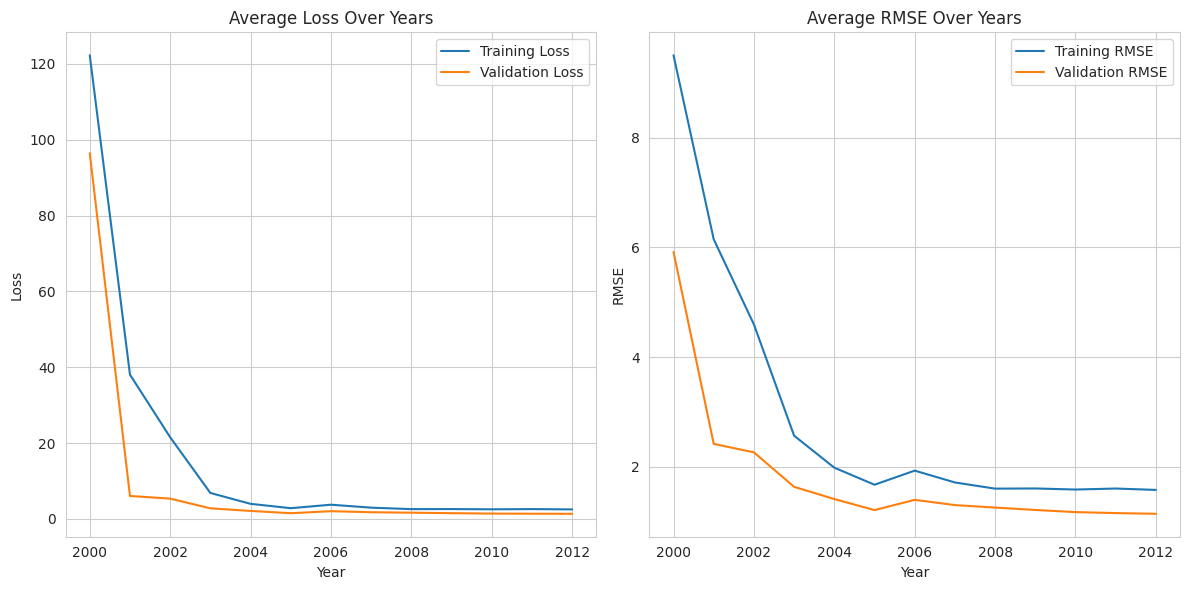

In [51]:
# TRAINING PHASE

from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)

training_histories = []

for year in training_years:
    print(f"\nTraining on data up to year {year}...")
    current_indices = X_train['Year'] <= year
    current_data = X_train_scaled[current_indices]
    current_target = y_train[current_indices]

    year_history = {'train_loss': [], 'val_loss': [], 'train_rmse': [], 'val_rmse': []}

    for fold, (train_index, val_index) in enumerate(kf.split(current_data)):
        X_train_fold, X_val_fold = current_data[train_index], current_data[val_index]
        y_train_fold, y_val_fold = current_target.iloc[train_index], current_target.iloc[val_index]

        history = model.fit(
            X_train_fold, y_train_fold,
            validation_data=(X_val_fold, y_val_fold),
            epochs=40,
            verbose=0
        )

        year_history['train_loss'].append(np.mean(history.history['loss'][-5:]))
        year_history['val_loss'].append(np.mean(history.history['val_loss'][-5:]))
        year_history['train_rmse'].append(np.mean(history.history['root_mean_squared_error'][-5:]))
        year_history['val_rmse'].append(np.mean(history.history['val_root_mean_squared_error'][-5:]))

    training_histories.append({
        'train_loss': np.mean(year_history['train_loss']),
        'val_loss': np.mean(year_history['val_loss']),
        'train_rmse': np.mean(year_history['train_rmse']),
        'val_rmse': np.mean(year_history['val_rmse'])
    })


# Plot the training and validation performance
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
train_losses = [history['train_loss'] for history in training_histories]
val_losses = [history['val_loss'] for history in training_histories]
plt.plot(training_years, train_losses, label='Training Loss')
plt.plot(training_years, val_losses, label='Validation Loss')
plt.title('Average Loss Over Years')
plt.xlabel('Year')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
train_rmses = [history['train_rmse'] for history in training_histories]
val_rmses = [history['val_rmse'] for history in training_histories]
plt.plot(training_years, train_rmses, label='Training RMSE')
plt.plot(training_years, val_rmses, label='Validation RMSE')
plt.title('Average RMSE Over Years')
plt.xlabel('Year')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()


Testing on year 2013.0...
5/5 [==============================] - 0s 2ms/step
Tested on year 2013.0: R-squared (R2) = 0.5840, RMSE = 5.4482

Testing on year 2014.0...
5/5 [==============================] - 0s 2ms/step
Tested on year 2014.0: R-squared (R2) = 0.5947, RMSE = 5.5585


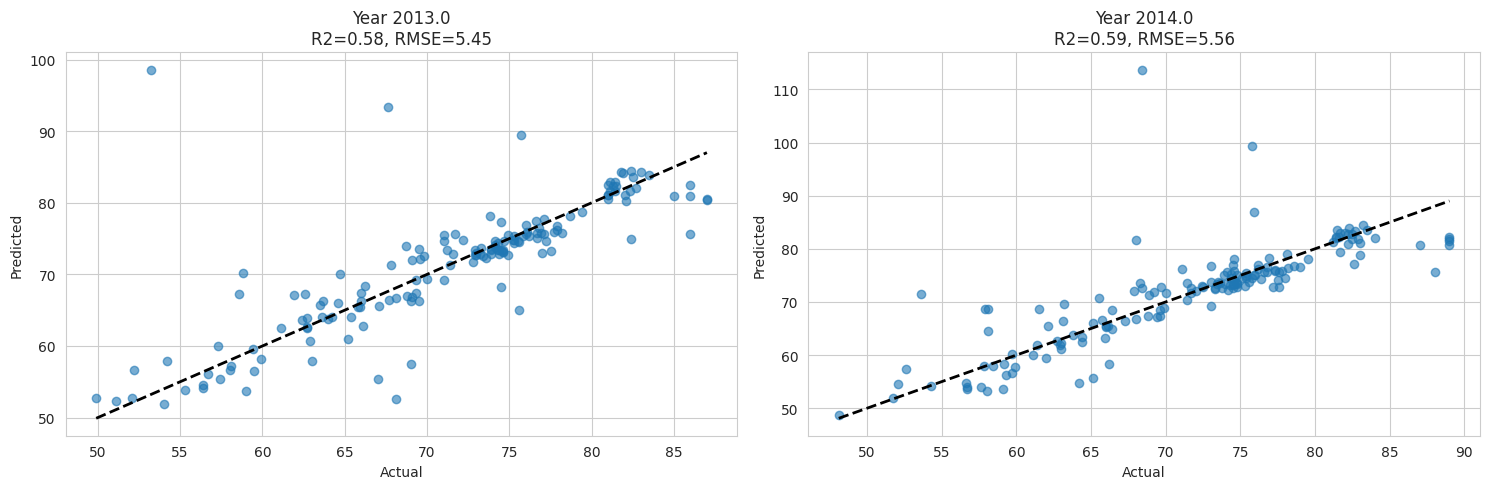


Overall performance on the test set:
R-squared (R2): 0.5896
RMSE: 5.5036


In [52]:
# EVALUATION PHASE

plt.figure(figsize=(15, 5))

all_y_test = []
all_y_pred = []

for i, year in enumerate(testing_years):
    print(f"\nTesting on year {year}...")
    test_indices = X_test['Year'] == year
    X_year_test = X_test_scaled[test_indices]

    # Use .iloc to index y_test based on the positions of the true values in test_indices
    y_year_test = y_test.iloc[test_indices[test_indices].index]

    # Predict and evaluate
    y_pred = model.predict(X_year_test).flatten()
    all_y_test.extend(y_year_test.tolist())  # Convert to list for extending
    all_y_pred.extend(y_pred.tolist())

    r2 = r2_score(y_year_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_year_test, y_pred))
    print(f"Tested on year {year}: R-squared (R2) = {r2:.4f}, RMSE = {rmse:.4f}")

    # Plot actual vs. predicted life expectancy
    plt.subplot(1, len(testing_years), i+1)
    plt.scatter(y_year_test, y_pred, alpha=0.6)
    plt.plot([min(all_y_test), max(all_y_test)], [min(all_y_test), max(all_y_test)], 'k--', lw=2)
    plt.title(f'Year {year}\nR2={r2:.2f}, RMSE={rmse:.2f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

# Overall performance
overall_r2 = r2_score(all_y_test, all_y_pred)
overall_rmse = np.sqrt(mean_squared_error(all_y_test, all_y_pred))
print(f"\nOverall performance on the test set:")
print(f"R-squared (R2): {overall_r2:.4f}")
print(f"RMSE: {overall_rmse:.4f}")


# Actual model conclusions

We can see that we've reached the following stats for the actual model:

* At the year of 2013 we've reached 0.58 R2 score and 5.45 RMSE score.
* At the year of 2014 we've reached 0.59 R2 score and 5.56 RMSE score.
* In general we've reached an average of 0.5896 R2 score and 5.5036 RMSE score.

In comparison with the model above that we got the following results:

*  -8.42 R2 score and 25.93 RMSE score for 2013.
*  -46.54 R2 score and 60.20 RMSE score for 2014
* and In general we've reached an average of -28.1023 R2 score and 46.3471 RMSE score.

This suggests on several interesting results we can learn from here:
* We received drestically lower R2 and RMSE scores for the actual model.
* We received opposite signs of the R2 score between the two models.
* In year 2014 the predictions are much better and has a much lower error at the actual model.


So we can see that even though the two models (benchmark and actual) received the same epochs and the same hyper-parametrs but only the training method was different (because we used curriculum-learning methodology at the actual model) it made a big difference.

And even though that curriculum learning usually deals with the samples difficulty difference, here we might just see that it also assist it to understand better the data.

We believe that the reason for that is because when you train the model by a specific order of years, or general of the data when you can, you assist the model to learn the connections and logic-relation between the different years.
You assist it to learn how the data changes through time, and you assist it to understand where to put it's focus on, and you assist it to focus on the most recently-updated data because it trains on the final years last.

For the reason 'why does curriculum learning works at all?' we qoute from Elman's work (1993) 'The importance of starting small':
> Training fails in the case of networks which are fully formed and ‘adultlike’ in their capacity. Training succeeds only when networks begin with
limited working memory and gradually ‘mature’ to the adult state. This result
suggests that rather than being a limitation, developmental restrictions on resources
may constitute a necessary prerequisite for mastering certain complex domains.
Specifically, successful learning may depend on starting small.


# So, To Conclude:

In this project, we added additional data to the original data, we researched the data to understand it better, then we pre-processed the data, and then we the curriculum learning method was utilized to train a neural network model aimed at predicting life expectancy.

The model was trained on data from the years 2000 to 2012, using a range of economic, social, and health-related features. This structured training approach was designed to improve the model's efficiency and accuracy in learning.

The model's predictive performance was subsequently evaluated on data from the years 2013 and 2014, providing insight into its capability to generalize and accurately predict life expectancy based on the identified features using the improved and dedicated NN architecture we developed in order to solve this predictive problem successfully and more accuraly as well.

We showed an interesting approach on how to learn time-driven data and explained our key-learnings in the process.

## Comparing with other works from Kaggle:

So this is our last part but not least, when looking over other works in Kaggle we found some interesting findings.

When starting to go over the notebooks, most of the works were of Advanced-Tree-Regression models such as DecisionTree, RandomForest, and more, and expected LinearRegression, PolynomialRegression methods and more, which is where we started before we wanted to utilize the curriculum learning method.

But then we found some models that used NeuralNetworks as well but without adding any additional data and without using any dropout or batchnormalization or years seperation methods, it took them 600 epochs to get decent results instead of 30! (you can check it here - https://www.kaggle.com/code/mohamedsalemmohamed/life-expectancy-prediction-with-nn#Modeling).

We couldn't find any other notebook that added additional data from other datasets, seperated the training to years and used NN architecture while utilizing the curriculum learning method.